# Loan Data from Prosper


This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
print(loans.shape)
print(loans.info())
loans.head()

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#Check for duplicated records
loans[loans.duplicated()]


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


###### No Duplication

In [5]:
# descriptive statistics for numeric variables
print(loans.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

In [6]:
#convert date columns to datetime data type
loans['ListingCreationDate']=pd.to_datetime(loans['ListingCreationDate'])
loans['ClosedDate']=pd.to_datetime(loans['ClosedDate'])
loans['DateCreditPulled']=pd.to_datetime(loans['DateCreditPulled'])
loans['LoanOriginationDate']=pd.to_datetime(loans['LoanOriginationDate'])
loans['FirstRecordedCreditLine']=pd.to_datetime(loans['FirstRecordedCreditLine'])
  


loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [7]:
##See value counts for some columns to gain more intution and to see what is important and waht to ignore
## And if some columns need to be cleaned
for column in loans:
    print('########################')
    print(column,loans[column].value_counts().sum(),'\n', loans[column].value_counts())

########################
ListingKey 113937 
 17A93590655669644DB4C06    6
8474358854651984137201C    4
DE8535960513435199406CE    4
47C1359638497431975670B    4
349D3587495831350F0F648    4
                          ..
51BF33741958794376BDFFF    1
09D135807403953552D1846    1
AAAD3579836893223D876DF    1
E9D9359079231884438C75E    1
1682360401340070627607F    1
Name: ListingKey, Length: 113066, dtype: int64
########################
ListingNumber 113937 
 951186     6
1056749    4
1057901    4
882888     4
892845     4
          ..
841039     1
533841     1
539986     1
537939     1
1048576    1
Name: ListingNumber, Length: 113066, dtype: int64
########################
ListingCreationDate 113937 
 2013-10-02 17:20:16.550    6
2013-12-06 11:44:58.283    4
2013-08-28 20:31:41.107    4
2013-12-06 05:43:13.830    4
2013-09-08 09:27:44.853    4
                          ..
2014-01-18 21:36:14.867    1
2013-09-25 12:22:13.077    1
2011-11-30 14:03:05.580    1
2007-03-15 09:31:57.393    1
2006

TotalTrades 106393 
 17.0     3800
20.0     3775
18.0     3766
19.0     3745
16.0     3728
         ... 
114.0       1
118.0       1
108.0       1
96.0        1
97.0        1
Name: TotalTrades, Length: 108, dtype: int64
########################
TradesNeverDelinquent (percentage) 106393 
 1.00    41705
0.96     4245
0.95     3755
0.90     3171
0.94     3051
        ...  
0.19        5
0.06        3
0.49        1
0.03        1
0.99        1
Name: TradesNeverDelinquent (percentage), Length: 98, dtype: int64
########################
TradesOpenedLast6Months 106393 
 0.0     54249
1.0     31475
2.0     13180
3.0      4678
4.0      1646
5.0       652
6.0       273
7.0       116
8.0        54
9.0        24
10.0       13
11.0       12
12.0        8
13.0        5
14.0        2
17.0        2
15.0        2
20.0        1
16.0        1
Name: TradesOpenedLast6Months, dtype: int64
########################
DebtToIncomeRatio 105383 
 0.18000    4132
0.22000    3687
0.17000    3616
0.14000    3553
0.2000

In [8]:
#Lets drop some columns not to disturb us and to focus to a lower number of columns.
loans2 = loans.drop(columns = [
'CreditGrade',
'BorrowerRate',
'LenderYield',
'EstimatedReturn' ,
'EstimatedEffectiveYield',
'EstimatedLoss',
'EstimatedLoss',
'EstimatedLoss',
'ProsperRating (numeric)',
'ProsperRating (Alpha)',
'ProsperScore',
'CurrentlyInGroup',
'GroupKey',
'CreditScoreRangeLower',
'CreditScoreRangeUpper',
'TotalCreditLinespast7years',
'OpenRevolvingAccounts',
'OpenRevolvingMonthlyPayment',
'InquiriesLast6Months',
'TotalInquiries',
'PublicRecordsLast10Years',
'PublicRecordsLast12Months',
'RevolvingCreditBalance',
'LoanKey',
'TotalProsperLoans',
'TotalProsperPaymentsBilled',
'OnTimeProsperPayments',
'ProsperPaymentsLessThanOneMonthLate',
'ProsperPaymentsOneMonthPlusLate',
'ProsperPrincipalBorrowed',
'ProsperPrincipalOutstanding',
'ScorexChangeAtTimeOfListing',
'LoanFirstDefaultedCycleNumber',
'MonthlyLoanPayment',
'InvestmentFromFriendsCount',
'InvestmentFromFriendsAmount',
'Investors'], axis=1)

In [9]:
#info
loans2.info()
loans2.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 46 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   ListingKey                          113937 non-null  object        
 1   ListingNumber                       113937 non-null  int64         
 2   ListingCreationDate                 113937 non-null  datetime64[ns]
 3   Term                                113937 non-null  int64         
 4   LoanStatus                          113937 non-null  object        
 5   ClosedDate                          55089 non-null   datetime64[ns]
 6   BorrowerAPR                         113912 non-null  float64       
 7   ListingCategory (numeric)           113937 non-null  int64         
 8   BorrowerState                       108422 non-null  object        
 9   Occupation                          110349 non-null  object        
 10  Employme

,ListingNumber,Term,BorrowerAPR,ListingCategory (numeric),EmploymentStatusDuration,CurrentCreditLines,OpenCreditLines,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,...,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations
count,1.139370e+05,113937.000000,113912.000000,113937.000000,106312.000000,106333.000000,106333.000000,113240.000000,106315.000000,112947.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,2.774209,96.071582,10.317192,9.260164,0.592052,984.507059,4.154984,...,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027
std,3.280762e+05,10.436212,0.080364,3.996797,94.480605,5.457866,5.022644,1.978707,7158.270157,10.160216,...,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353
min,4.000000e+00,12.000000,0.006530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000
25%,4.009190e+05,36.000000,0.156290,1.000000,26.000000,7.000000,6.000000,0.000000,0.000000,0.000000,...,1005.760000,500.890000,274.870000,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,6.005540e+05,36.000000,0.209760,1.000000,67.000000,10.000000,9.000000,0.000000,0.000000,0.000000,...,2583.830000,1587.500000,700.840100,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.926340e+05,36.000000,0.283810,3.000000,137.000000,13.000000,12.000000,0.000000,0.000000,3.000000,...,5548.400000,4000.000000,1458.540000,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.255725e+06,60.000000,0.512290,20.000000,755.000000,59.000000,54.000000,83.000000,463881.000000,99.000000,...,40702.390000,35000.000000,15617.030000,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000


In [10]:
#We found some records with Null Borrower State. Not too much comparing to number of records... Let's drop them
loans2=loans2.dropna(subset=['BorrowerState'])

# Some pre Questions : 
            Top loans categories number of loans and amount
            Top State number of loans and amount
            state and loan category number/amount of loans
            
            Employment status with loan status
            Is home borrower with loan status 
            
            IncomeRange with loan status for income veridfied only
            Recommendations with loan status
            
            Occupation&monthly income which makes the most loans / which are the most chared off
            
                        
            
            What factors affect a loan’s outcome status?


            What affects the borrower’s APR or interest rate?


          



### Creating New Column with the description of the loan category

In [11]:
cat = { 0 : "Not Available", 1 : "Debt Consolidation", 2 : "Home Improvement", 3 : "Business", 4 : "Personal Loan"
       , 5 : "Student Use", 6 : "Auto", 7 : "Other", 8 : "Baby&Adoption", 9 : "Boat", 10 : "Cosmetic Procedure"
       , 11 : "Engagement Ring", 12 : "Green Loans", 13 : "Household Expenses", 14 : "Large Purchases", 15 : "Medical/Dental"
       , 16 : "Motorcycle", 17 : "RV", 18 : "Taxes", 19 : "Vacation", 20 : "Wedding Loans" }

In [12]:
#create a list for loans category description
cat_list = []
for i in loans2['ListingCategory (numeric)']:
    cat_list.append(cat[i])


In [13]:
loans2['ListingCategory (cat)'] = cat_list

In [14]:
#creating New Column for Employment Status

In [15]:



EmploymentStatus_list = []
for i in loans2['EmploymentStatus']:
    if (i =='Employed') or (i =='Full-time') or (i =='Self-employed') or (i =='Part-time'): 
        EmploymentStatus_list.append('Employed')
    else:
        EmploymentStatus_list.append('Not Employed / Other')
    
loans2['EmploymentStatus2'] = EmploymentStatus_list


In [16]:
#describe the columns to gain more intuition
for column in loans2:
    print(column, '###############################')
    print(loans2[column].describe())
    print('#######################################')
    print('#######################################')

ListingKey ###############################
count                      108422
unique                     107551
top       17A93590655669644DB4C06
freq                            6
Name: ListingKey, dtype: object
#######################################
#######################################
ListingNumber ###############################
count    1.084220e+05
mean     6.560847e+05
std      3.106933e+05
min      6.537000e+03
25%      4.528310e+05
50%      6.185995e+05
75%      9.113932e+05
max      1.255725e+06
Name: ListingNumber, dtype: float64
#######################################
#######################################
ListingCreationDate ###############################
count                         108422
unique                        107549
top       2013-10-02 17:20:16.550000
freq                               6
first            2006-04-19 00:14:12
last      2014-03-10 12:20:53.760000
Name: ListingCreationDate, dtype: object
#######################################
################

C:\Users\aheikal\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.
C:\Users\aheikal\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.
C:\Users\aheikal\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `

count    104594.000000
mean          9.291556
std           5.019439
min           0.000000
25%           6.000000
50%           9.000000
75%          12.000000
max          54.000000
Name: OpenCreditLines, dtype: float64
#######################################
#######################################
CurrentDelinquencies ###############################
count    108350.000000
mean          0.528426
std           1.829299
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          83.000000
Name: CurrentDelinquencies, dtype: float64
#######################################
#######################################
AmountDelinquent ###############################
count    104578.000000
mean        973.071965
std        7156.178179
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      463881.000000
Name: AmountDelinquent, dtype: float64
#######################################
##########################

C:\Users\aheikal\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


# Univariate plots

In [17]:
base_color = sb.color_palette()[0]

#### 1. The count of Each Category

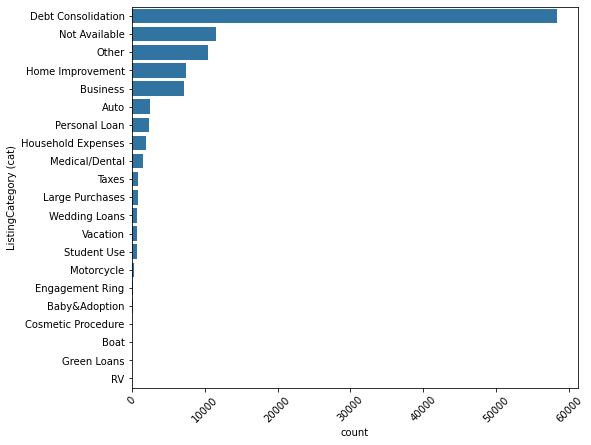

In [18]:

plt.figure(figsize = [8,7]);
sb.countplot(data=loans2, y='ListingCategory (cat)', order=loans2['ListingCategory (cat)'].value_counts().index
            , color = base_color );
plt.xticks(rotation=45);


##### We found that There is category for Not Available and another one for Others... Let's combine them not to disturb us 

In [19]:
#Lets combile Not Available & Others in one category
loans2['ListingCategory (cat)']=loans2['ListingCategory (cat)'].replace('Not Available', 'Other / Not Available').replace('Other', 'Other / Not Available')
#loans2[(loans2 ['ListingCategory (cat)']=='Not Available') | (loans2 ['ListingCategory (cat)']=='Other')]['ListingCategory (cat)'] 

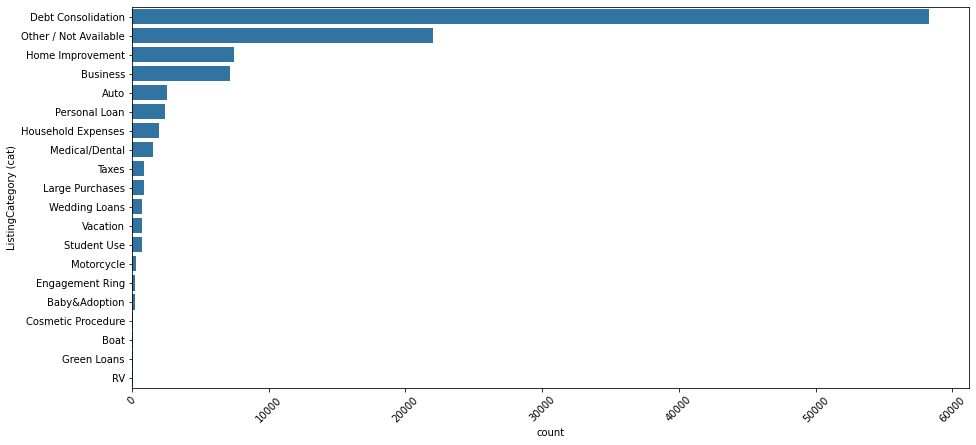

In [20]:
plt.figure(figsize = [15,7]);
sb.countplot(data=loans2, y='ListingCategory (cat)', order=loans2['ListingCategory (cat)'].value_counts().index
            , color = base_color);
plt.xticks(rotation=45);


##### We found out that most of the loans are for Debt Consolidation followed by home Improvement and Business.
##### Smaller Number of loans are for RV, Green, Boat, Cosmetic, Baby....
##### .

#### 2. The count of Each Borrower State

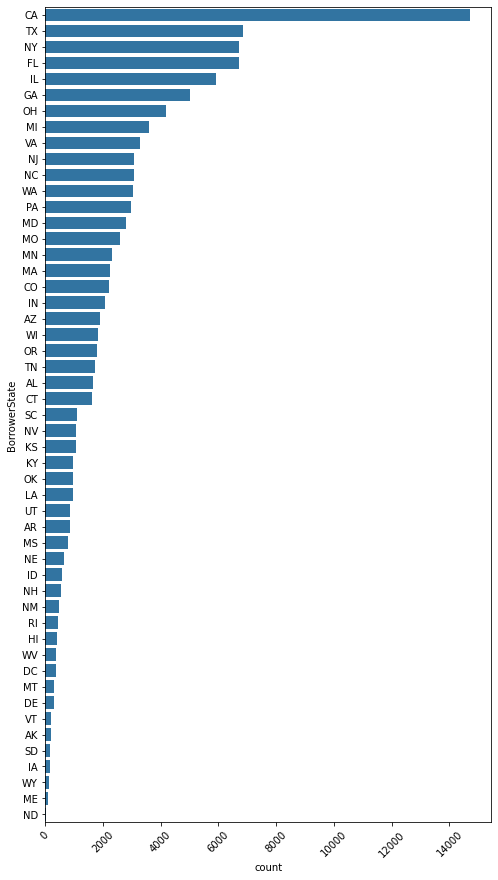

In [21]:
plt.figure(figsize = [8,15]);
sb.countplot(data=loans2, y='BorrowerState', order=loans2['BorrowerState'].value_counts().index
            , color = sb.color_palette()[0]);
plt.xticks(rotation=45);

##### As we saw, the top State in number of loans is California and North Dakota is the lowest.

#### 3. Histograms for some numeric variables.. (Distrubition of loan amount, customer payments and monthly income)

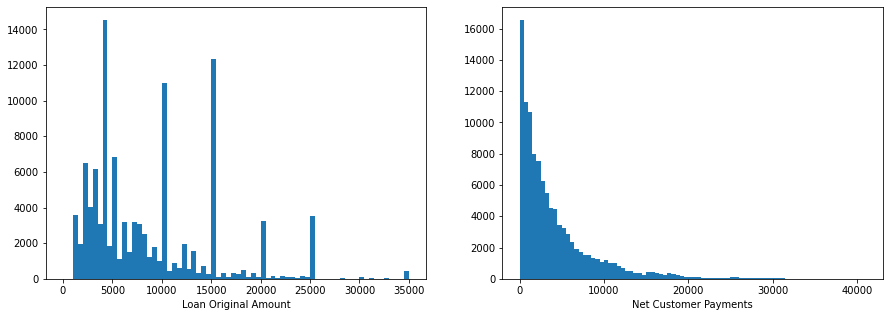

In [22]:
# Histogram for some numeric Variables

plt.figure(figsize=[15, 5])
plt.subplot(1,2,1)
binsize = 500
bins = np.arange(0, loans2['LoanOriginalAmount'].max()+binsize, binsize)
plt.hist(data = loans2, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount');

plt.subplot(1,2,2)
binsize = 500
bins = np.arange(0, loans2['LP_CustomerPayments'].max()+binsize, binsize)
plt.hist(data = loans2, x = 'LP_CustomerPayments', bins = bins)
plt.xlabel('Net Customer Payments');




##### The customers takes loans starting from 1000 and custoers tends to take loans with values with multiples of 5000, alot of loans has values 5000,10000,15000 and also 20000 and 25000 and the maximum is 35000 with lower frequency
##### Customers Don't pay too much comparing to the loan amounts.. so we have a lot of delequencies

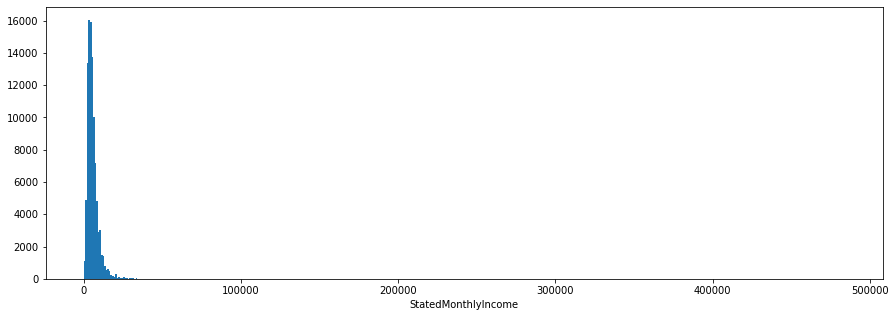

In [23]:
# Histogram for Stated Monthly Income for income verified borrowers only
plt.figure(figsize=[15, 5])
binsize = 1000
loans_income_verified = loans2[loans2['IncomeVerifiable']]
bins = np.arange(0, loans_income_verified['StatedMonthlyIncome'].max()+binsize, binsize)
plt.hist(data = loans_income_verified, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('StatedMonthlyIncome');

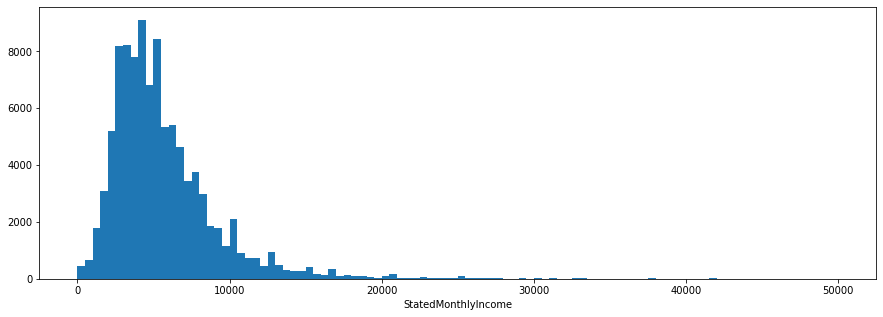

In [24]:
#let's discard the incomes above 50000
loans_Reasonable_income =  loans_income_verified[loans_income_verified['StatedMonthlyIncome']<50000]

plt.figure(figsize=[15, 5])
binsize = 500
bins = np.arange(0, loans_Reasonable_income['StatedMonthlyIncome'].max()+binsize, binsize)
plt.hist(data = loans_Reasonable_income, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('StatedMonthlyIncome');


##### The monthly Income tends to be a normal distribution curve after discarding too high values with average monthly income of about 5000 USD

# Bivariate Plots

#### What is the average loan amount for each category?

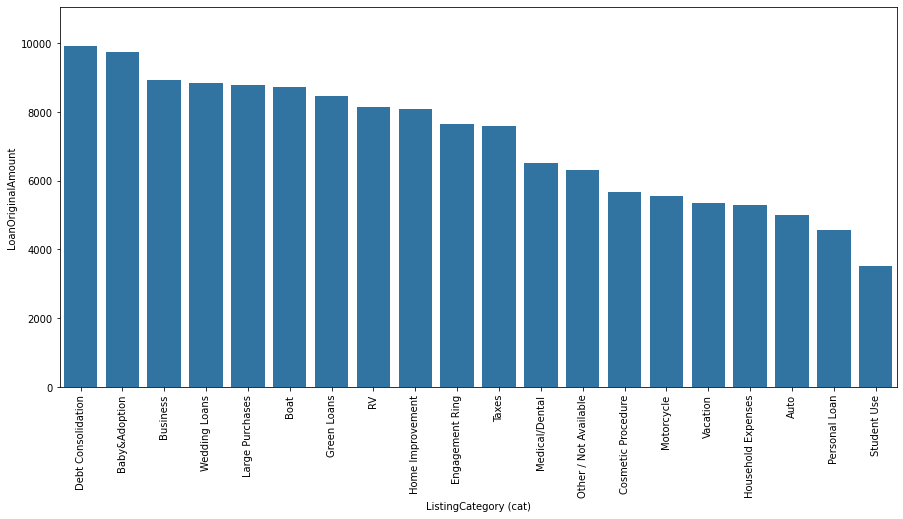

In [25]:
order_by_value=pd.DataFrame(loans2.groupby(['ListingCategory (cat)']).mean()['LoanOriginalAmount']).sort_values(by=['LoanOriginalAmount'], ascending=False).index
plt.figure(figsize = [15,7]);
sb.barplot(data = loans2, x = 'ListingCategory (cat)', y = 'LoanOriginalAmount',color = sb.color_palette()[0],errwidth=0,
          order=order_by_value);
plt.xticks(rotation=90);

##### We noticed that on average, the Debt consolidation loan has larger amount of the other types of loans followed by Baby&Adoption Loans.  On Average the student loan has the lowest amount.

### What is the Average loan amount for each state?

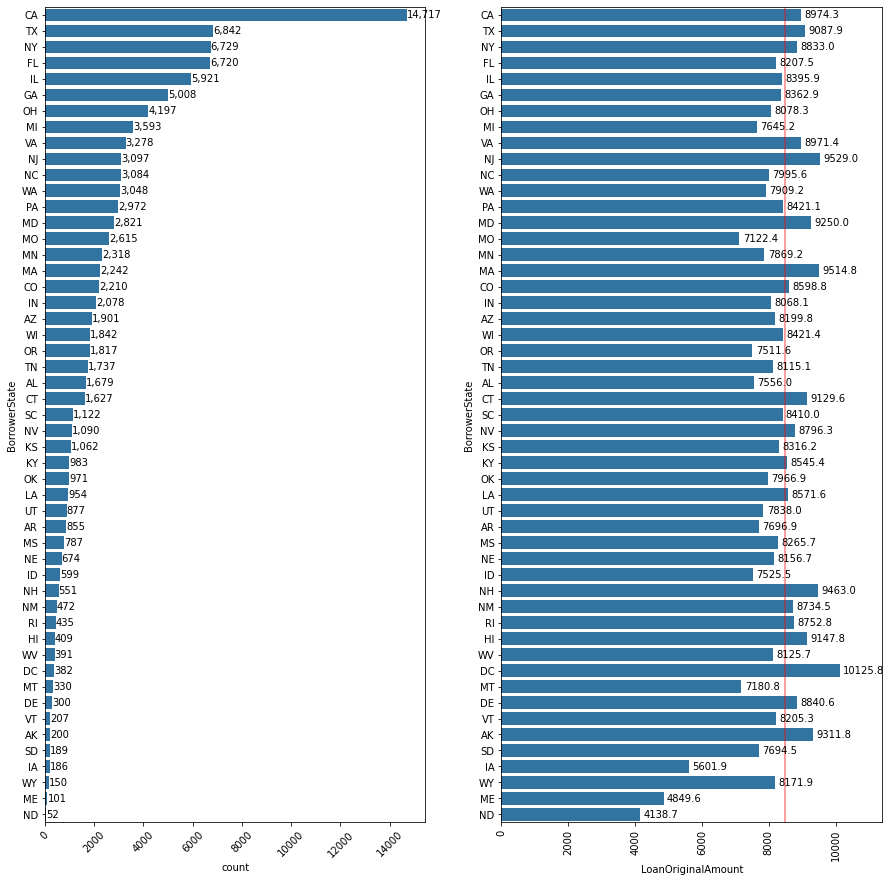

In [26]:
plt.figure(figsize = [15,15])

plt.subplot(1,2,1)
sb.countplot(data=loans2, y='BorrowerState', order=loans2['BorrowerState'].value_counts().index
            , color = sb.color_palette()[0]);
plt.xticks(rotation=45);
#print text labels for the count for each state
for i in range(loans2['BorrowerState'].value_counts().shape[0]):
    count = loans2['BorrowerState'].value_counts()[i]
    str = '{:,}'.format(count)
    plt.text(count+1, i, str, va='center')

    
plt.subplot(1,2,2)
sb.barplot(data = loans2, y = 'BorrowerState', x = 'LoanOriginalAmount',color = sb.color_palette()[0],errwidth=0,
          order=loans2['BorrowerState'].value_counts().index);
plt.xticks(rotation=90);

order_by_count = loans2['BorrowerState'].value_counts().index
StateAndAmount = pd.DataFrame(loans2.groupby(['BorrowerState']).mean()['LoanOriginalAmount']).reset_index()
StateAndAmount['AmountOrderedByCount']=pd.Categorical(
    StateAndAmount['BorrowerState'], 
    categories=order_by_count, 
    ordered=True
)
StateAndAmount=StateAndAmount.sort_values('AmountOrderedByCount')

for i in range(loans2['BorrowerState'].value_counts().shape[0]):
    mean_amount = StateAndAmount.reset_index()['LoanOriginalAmount'][i]
    str = '{:.1f}'.format(mean_amount)
    plt.text(mean_amount+100, i, str, va='center')
plt.axvline(loans2['LoanOriginalAmount'].mean(),color='r',alpha=0.5)

##### On average, the loans of ND & ME & IA states, has a lower amount than the other states. And DC has the largest average of loan amount.

#### Let's discover some relationships between the numeric columns

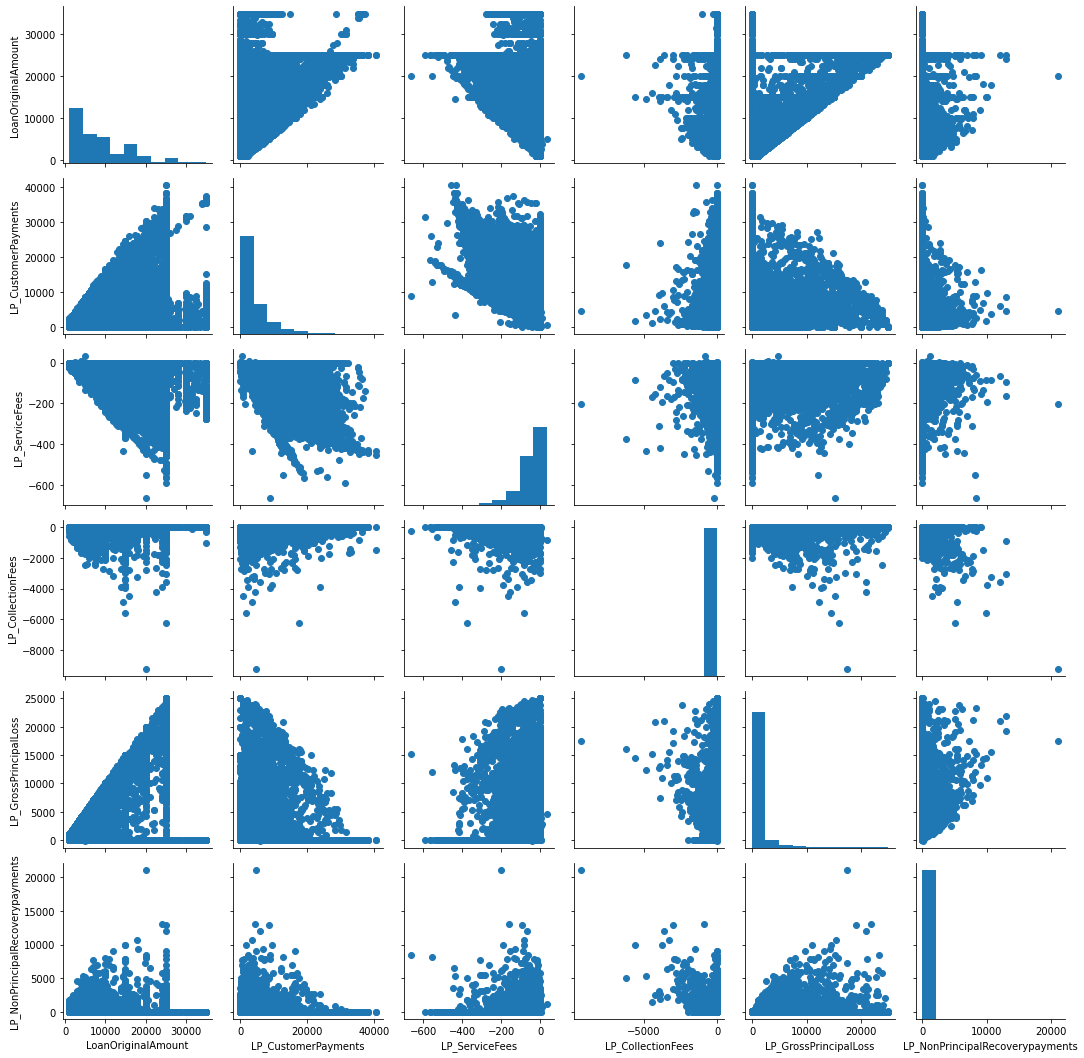

In [27]:
g=sb.PairGrid(data = loans2, vars = [
    'LoanOriginalAmount',
    'LP_CustomerPayments',
    'LP_ServiceFees',
    'LP_CollectionFees',
    'LP_GrossPrincipalLoss',
    'LP_NonPrincipalRecoverypayments'
]);
g.map_diag(plt.hist);
g.map_offdiag(plt.scatter);

#### What is the top loan Categories for some states?

In [28]:
#Get only top 6 states
loans2_sub = loans2.loc[loans2['BorrowerState'].isin(list(loans2['BorrowerState'].value_counts().iloc[:6].index))]
Top6_States = list(loans2_sub['BorrowerState'].value_counts().index)
ordered_states = pd.api.types.CategoricalDtype(ordered=True, categories=Top6_States)
loans2_sub['BorrowerState'] = loans2_sub['BorrowerState'].astype(ordered_states)


C:\Users\aheikal\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


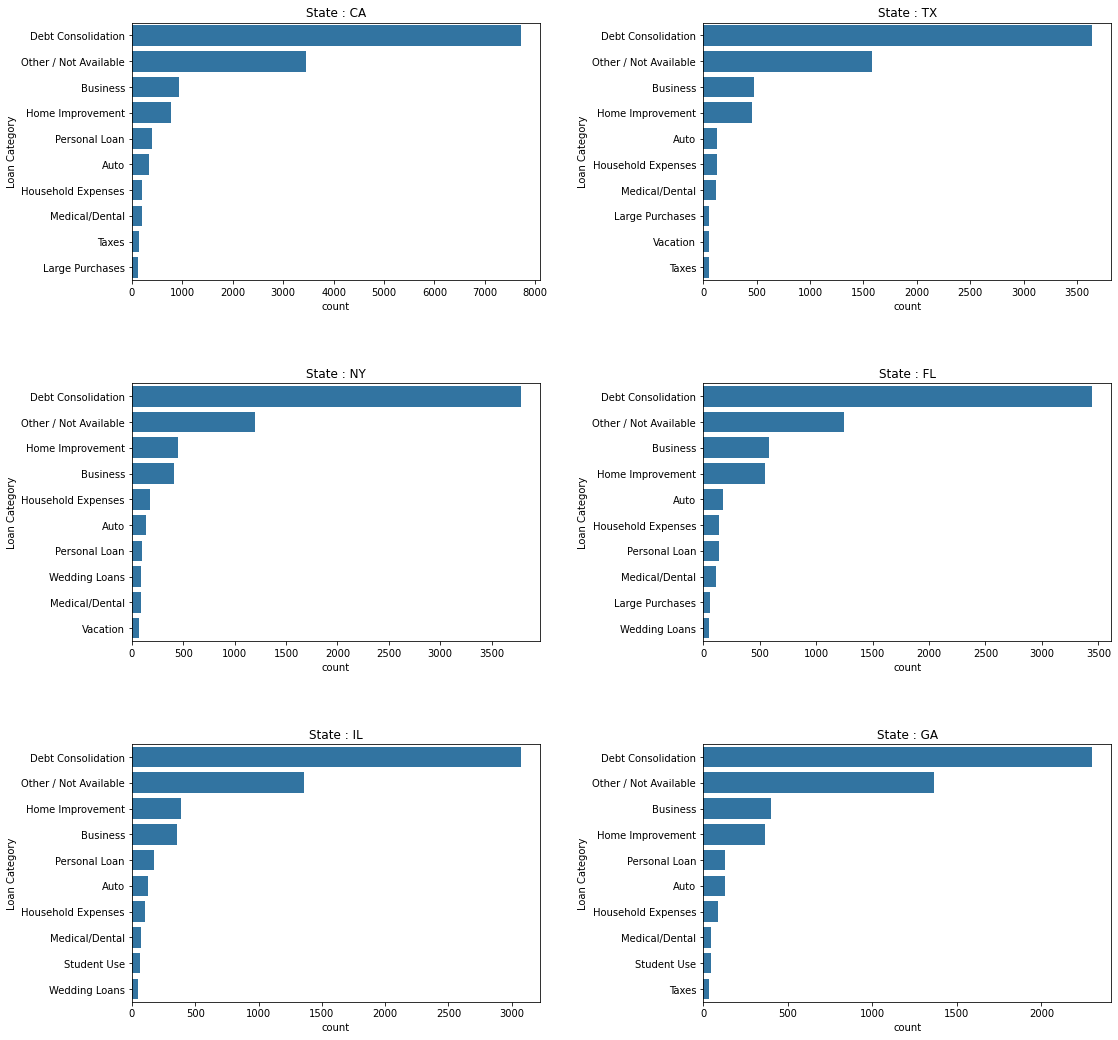

In [29]:


plt.figure(figsize = [17,17])


for i in range(loans2_sub['BorrowerState'].value_counts().shape[0]):
    state = loans2_sub['BorrowerState'].value_counts().index[i]
    plt.subplot(3,2,i+1)
    loans2_sub_sub = loans2_sub[loans2_sub['BorrowerState'] == state];
    #Get only top 10 Categories
    sb.countplot(data =loans2_sub_sub, y='ListingCategory (cat)',
          order=loans2_sub_sub['ListingCategory (cat)'].value_counts().iloc[:10].index, color = base_color);
    #plt.yticks(rotation=45);
    plt.title ('State : '+state)
    plt.ylabel('Loan Category')
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    
    
    
    

##### We saw - for each of the top six states - the top 10 loan categories

#### Is Home Owner? and theloan status

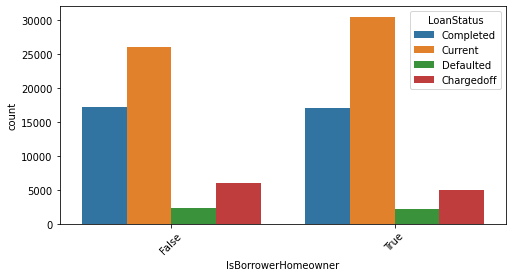

In [30]:
plt.figure(figsize = [8,4])
#first 4 loan Status
loans_sub = loans2.loc[loans2['LoanStatus'].isin(list(loans2['LoanStatus'].value_counts().iloc[:4].index))]
ax = sb.countplot(data = loans_sub, x='IsBorrowerHomeowner', hue = 'LoanStatus')
plt.xticks(rotation=45);

##### Not a big difference

#### Employment status and Loan status 

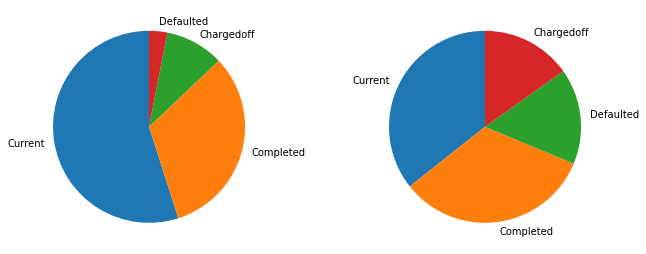

In [31]:
plt.figure(figsize = [10,8])
plt.subplot (1,2,1)
loans_employed = loans_sub[loans_sub['EmploymentStatus2'] == 'Employed']
sorted_counts = loans_employed['LoanStatus'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index,startangle = 90);
plt.subplot (1,2,2)
loans_employed = loans_sub[loans_sub['EmploymentStatus2'] == 'Not Employed / Other']
sorted_counts = loans_employed['LoanStatus'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index,startangle = 90);

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

##### We notice that if the borrower is employed, he has lower percentage to be defaulted or chargedoff

#### Relationship between loan status and monthly income

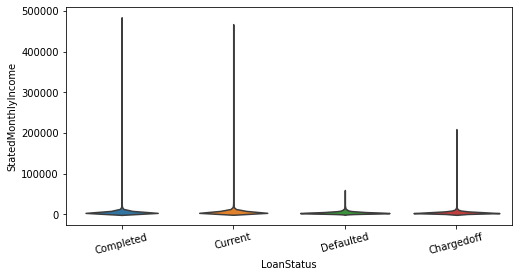

In [32]:
plt.figure(figsize = [8,4]);

loans_sub = loans_sub[loans_sub['IncomeVerifiable']];
sb.violinplot(data=loans_sub, x='LoanStatus',y='StatedMonthlyIncome', inner=None);
plt.xticks(rotation=15);

In [33]:
#Discard monthly incomes with 50000 or more
loans_income_sub=loans_sub[loans_sub['StatedMonthlyIncome']<50000]

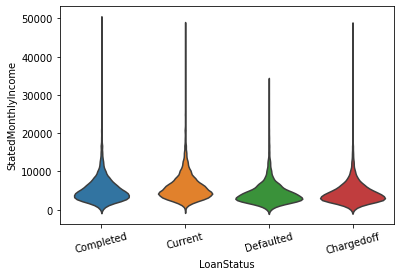

In [34]:
sb.violinplot(data=loans_income_sub, x='LoanStatus',y='StatedMonthlyIncome', inner=None);
plt.xticks(rotation=15);

#### We notice that defaulted and Charged off (bad indicators) have slightly lower monthly income

# Multivariate plots

#### Monthly income vs Loan Amount and Employment status.

C:\Users\aheikal\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x288 with 0 Axes>

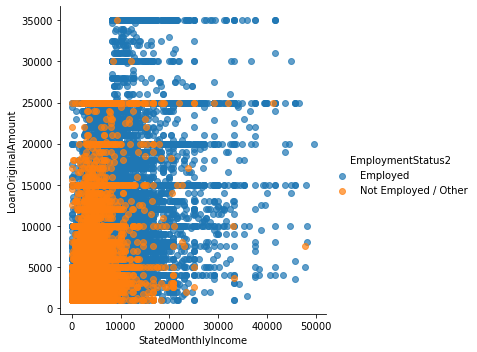

In [48]:
#loans_income_sub_employment=loans_income_sub
plt.figure(figsize = [10,4]);
g = sb.FacetGrid(data = loans_Reasonable_income, hue ='EmploymentStatus2',size = 5)
g.map(plt.scatter,'StatedMonthlyIncome','LoanOriginalAmount', alpha = 0.7)         
g.add_legend()

##### A weak positive correlation state that when the monthly income increase, the loan amount increase. unemployed or unavailable employment status has lower monthly income and lower loan amount than employed people.

In [36]:

loans_income_sub_employee = loans_Reasonable_income[(loans_Reasonable_income['EmploymentStatus'] == 'Self-employed') | (loans_Reasonable_income['EmploymentStatus'] == 'Employed') | (loans_Reasonable_income['EmploymentStatus'] == 'Full-time') | (loans_Reasonable_income['EmploymentStatus'] ==  'Part-time')]
loans_income_sub_others = loans_Reasonable_income[(loans_Reasonable_income['EmploymentStatus'] == 'Not available' ) | ( loans_Reasonable_income['EmploymentStatus'] ==  'Other' ) | ( loans_Reasonable_income['EmploymentStatus'] ==  'Not employed' ) | ( loans_Reasonable_income['EmploymentStatus'] ==  'Retired')]

C:\Users\aheikal\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


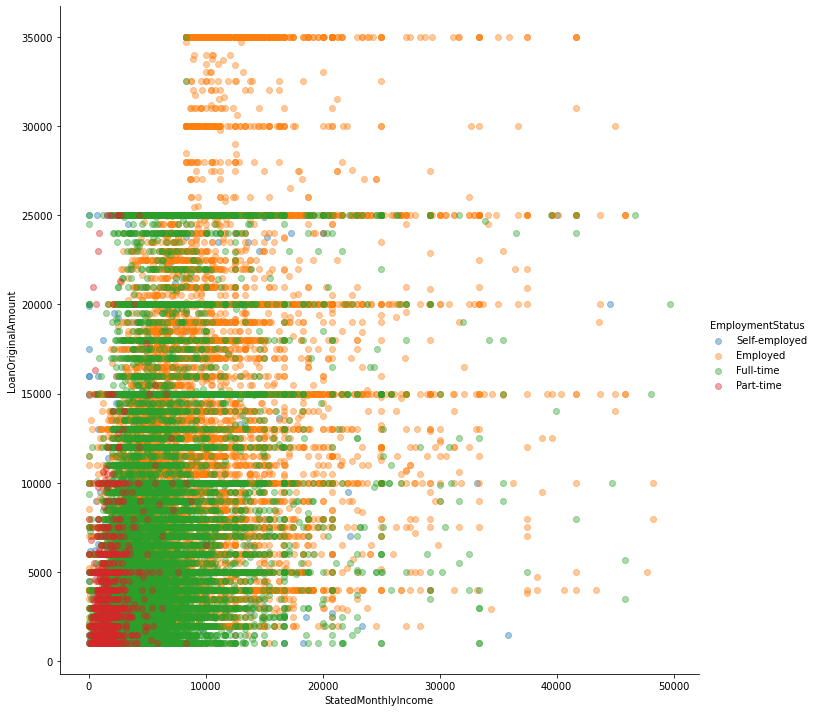

In [37]:
g = sb.FacetGrid(data = loans_income_sub_employee, hue ='EmploymentStatus',size = 10)
g.map(plt.scatter,'StatedMonthlyIncome','LoanOriginalAmount', alpha = 0.4)         
g.add_legend()

##### The part time emloyed has lower monthly income and lower loan amount

C:\Users\aheikal\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


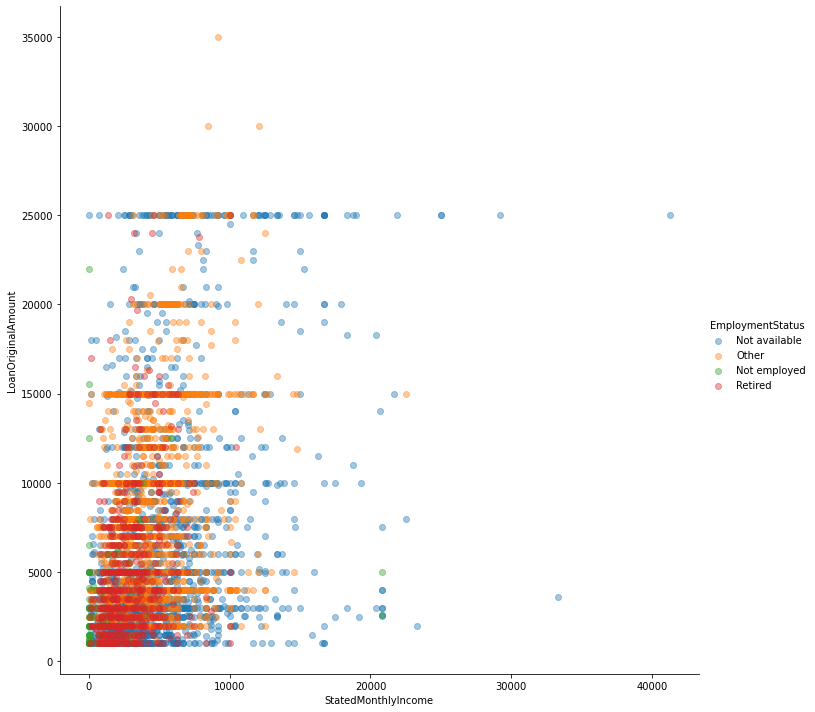

In [38]:
g = sb.FacetGrid(data = loans_income_sub_others, hue ='EmploymentStatus',size = 10)
g.map(plt.scatter,'StatedMonthlyIncome','LoanOriginalAmount', alpha = 0.4)         
g.add_legend()

# Other Bivariate plots

#### If the borrower has recommendation, will it affect the loan status ?? 

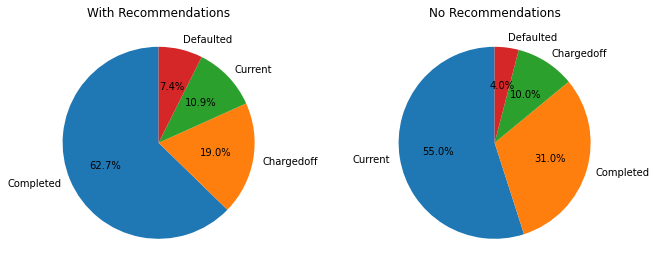

In [39]:
loans_sub = loans2.loc[loans2['LoanStatus'].isin(list(loans2['LoanStatus'].value_counts().iloc[:4].index))]
loans_sub_recommendations = loans_sub[loans_sub['Recommendations']>0]
loans_sub_no_recommendations = loans_sub[loans_sub['Recommendations']==0]

plt.figure(figsize = [10,8])
plt.subplot (1,2,1)
vc = loans_sub_recommendations['LoanStatus'].value_counts()
plt.pie(vc,labels =vc.index, startangle = 90,autopct='%1.1f%%')
plt.xticks(rotation=45);
plt.title('With Recommendations')


plt.subplot (1,2,2)
vc = loans_sub_no_recommendations['LoanStatus'].value_counts()
plt.pie(vc,labels = vc.index, startangle = 90,autopct='%1.1f%%')
plt.xticks(rotation=45);
plt.title('No Recommendations')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


##### Seems that if the borrower has recommendations he has more probability to be chared off or defaulted !! the opposit of what I expected

#### What is the average monthly income for each occupation and the average loan amounts for each occupation?

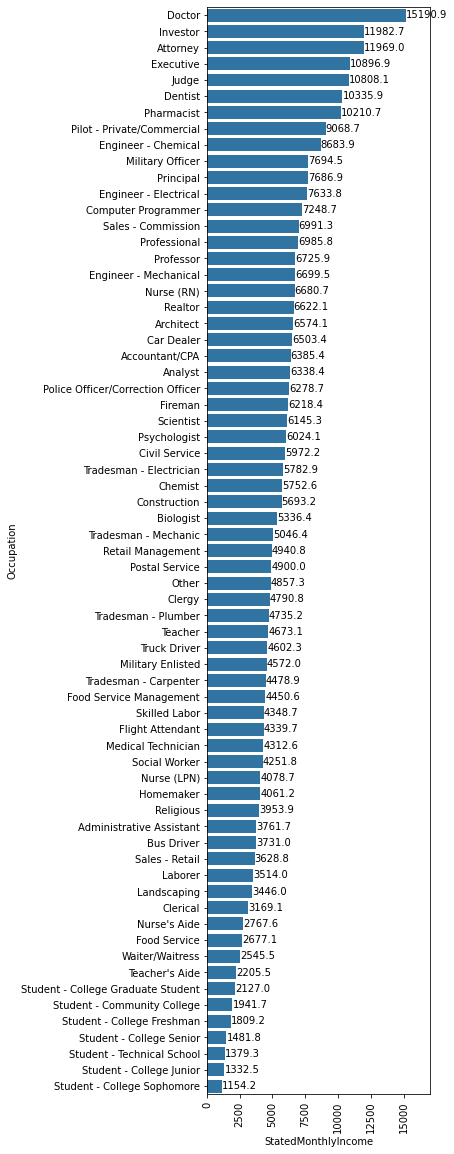

In [40]:
plt.figure(figsize = [4,20]);
loans_Income_Verified = loans2[loans2['IncomeVerifiable']];
orderr = loans_Income_Verified.groupby(["Occupation"])['StatedMonthlyIncome'].mean().reset_index().sort_values('StatedMonthlyIncome',ascending=False)
sb.barplot(data = loans_Income_Verified, x = 'StatedMonthlyIncome', y = 'Occupation',color = sb.color_palette()[0],errwidth=0
          ,order=orderr['Occupation']);

plt.xticks(rotation=90);


monthly_income_mean_by_occubation = loans_Income_Verified.groupby(["Occupation"])['StatedMonthlyIncome'].mean().reset_index().sort_values('StatedMonthlyIncome',ascending = False).reset_index()['StatedMonthlyIncome']

for i in range(loans_Income_Verified['Occupation'].value_counts().shape[0]):
    income = monthly_income_mean_by_occubation[i]
    str = '{:.1f}'.format(income)
    plt.text(income+1, i, str, va='center')

##### The doctors have the most average monthly income.. and the students are the lowest (make sense)

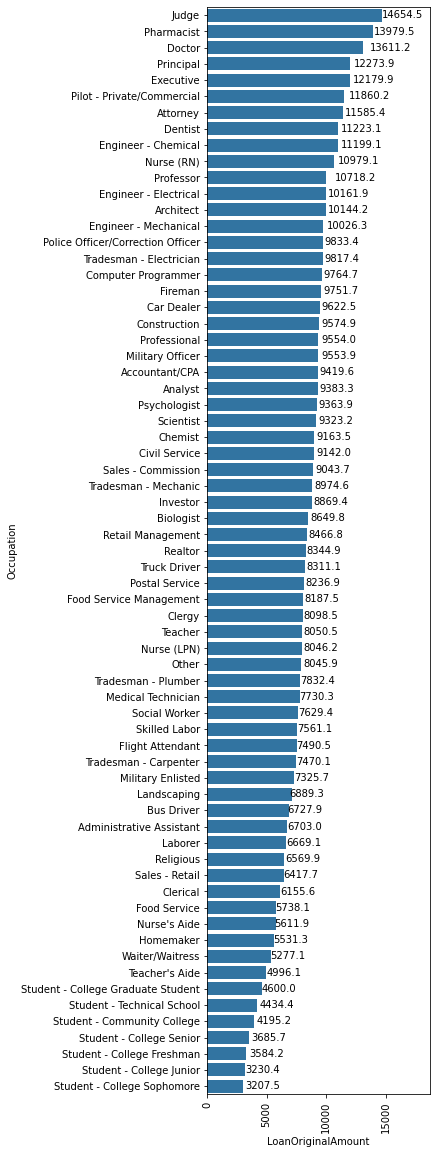

In [41]:
plt.figure(figsize = [4,20]);
orderr = loans2.groupby(["Occupation"])['LoanOriginalAmount'].mean().reset_index().sort_values('LoanOriginalAmount',ascending=False)
sb.barplot(data = loans2, x = 'LoanOriginalAmount', y = 'Occupation',color = sb.color_palette()[0],errwidth=0
          ,order=orderr['Occupation']);

plt.xticks(rotation=90);


loan_amount_mean_by_occubation = loans_Income_Verified.groupby(["Occupation"])['LoanOriginalAmount'].mean().reset_index().sort_values('LoanOriginalAmount',ascending = False).reset_index()['LoanOriginalAmount']

for i in range(loans2['Occupation'].value_counts().shape[0]):
    income = loan_amount_mean_by_occubation[i]
    str = '{:.1f}'.format(income)
    plt.text(income+1, i, str, va='center')

#### On average, the judges request loans of large loan amount and the students request small loan amount

#### The most common occupation (The most occupation that request loans)

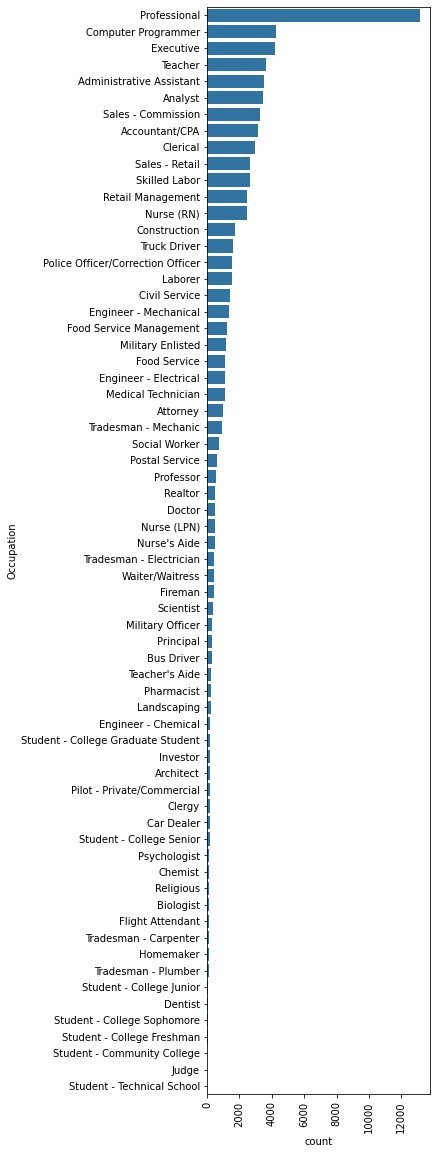

In [42]:
plt.figure(figsize = [4,20]);

sb.countplot(data = loans2[loans2['Occupation']!='Other'], y = 'Occupation',color = base_color,
            order=loans2[loans2['Occupation']!='Other']['Occupation'].value_counts().index);

plt.xticks(rotation=90);


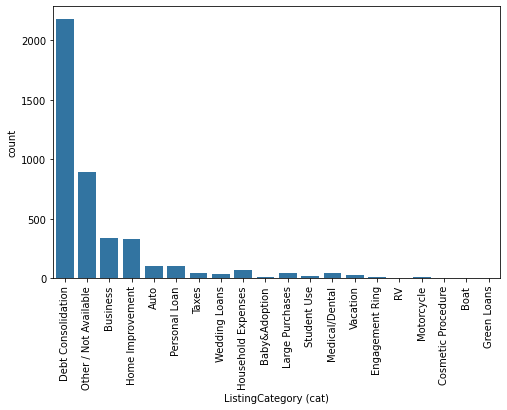

In [43]:
#The loan categories for the loans of computer programmers loans (Can be changed to any other occupation)
plt.figure(figsize = [8,5]);
sb.countplot(data = loans2[loans2['Occupation']=='Computer Programmer'], x = 'ListingCategory (cat)',color = base_color )
plt.xticks(rotation=90);

### The ratio of delequent loans for each occupation

C:\Users\aheikal\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


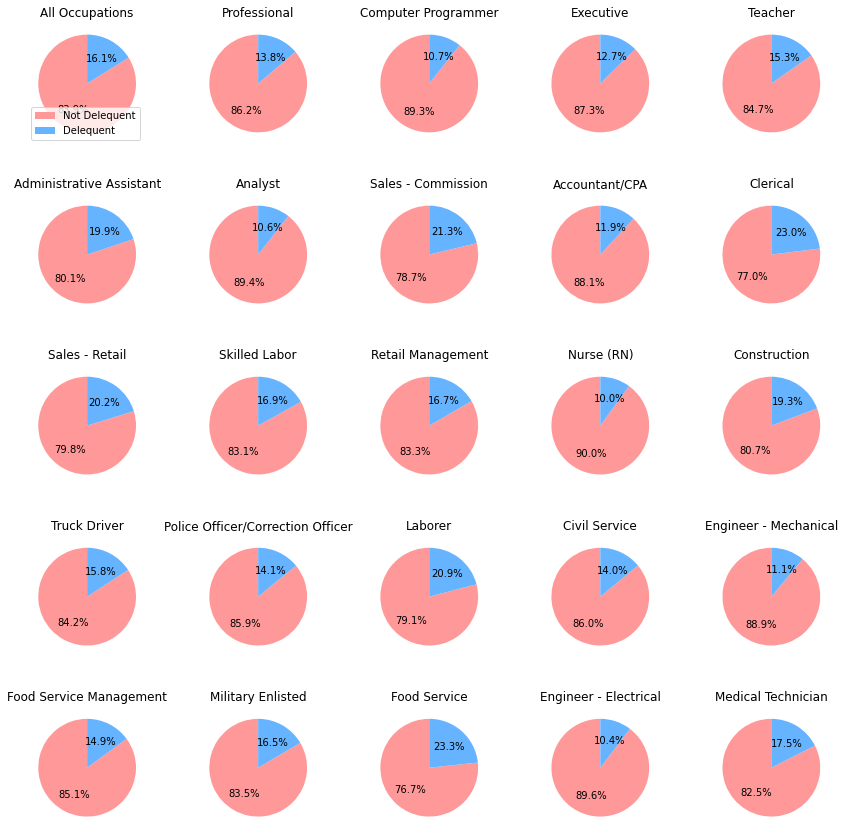

In [44]:

#discard cancelled and Final Payment In Progress
loans_sub_loanstatus = loans2[(loans2['LoanStatus'] != 'FinalPaymentInProgress')&(loans2['LoanStatus'] != 'Cancelled')]

#Group to Delequent and Not Delequent
loans_sub_loanstatus['LoanStatusGroup'] = loans_sub_loanstatus['LoanStatus'].replace('Chargedoff', 'Delequent')\
    .replace('Defaulted','Delequent').replace('Current', 'Not Delequent')\
    .replace('Completed', 'Not Delequent')\
    .replace('Past Due (1-15 days)', 'Delequent')\
    .replace('Past Due (31-60 days)', 'Delequent')\
    .replace('Past Due (61-90 days)', 'Delequent')\
    .replace('Past Due (91-120 days)', 'Delequent')\
    .replace('Past Due (16-30 days)', 'Delequent')\
    .replace('Past Due (>120 days)', 'Delequent')


plt.figure(figsize = [14,14])


labels = ['Not Delequent','Delequent']
sizes = [88.4, 10.6, 0.7, 0.3]
colors = ['#ff9999','#66b3ff']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)


plt.subplot(5,5,1)
plt.legend(patches, labels, loc="best")
vc = loans_sub_loanstatus['LoanStatusGroup'].value_counts()
plt.pie(vc, startangle = 90,  colors=colors,autopct='%1.1f%%')
plt.xticks(rotation=45);
plt.title('All Occupations')
#plt.show();

#vc.index
counter = 2

occupation_order = loans2[loans2['Occupation']!='Other']['Occupation'].value_counts().index
for i in occupation_order[:24]:
    plt.subplot(5,5,counter)
    #loans_sub = loans2.loc[loans2['LoanStatus'].isin(list(loans2['LoanStatus'].value_counts().iloc[:4].index))]
    vc = loans_sub_loanstatus[loans_sub_loanstatus['Occupation']== i]['LoanStatusGroup'].value_counts()
    plt.pie(vc,explode=None, startangle = 90,autopct='%1.1f%%',  colors = colors)
    plt.xticks(rotation=45);
    counter+=1
    plt.title(i)
    #plt.show();



plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

##### Nurse, analyst and computer programmer have  low delequencies ratio.. Clerical and Sales have high delequencies ratio

### Relationship between the Employment status, homw owning and state with the ARP

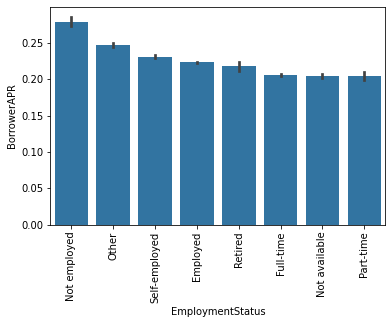

In [45]:
order_by_APR = pd.DataFrame(loans2.groupby(['EmploymentStatus']).mean()['BorrowerAPR']).sort_values(by=['BorrowerAPR'], ascending=False).index
sb.barplot(data=loans2,x='EmploymentStatus', y = 'BorrowerAPR', order = order_by_APR, color = base_color);
plt.xticks(rotation=90);
#range(loans2_sub['BorrowerState'].value_counts().shape[0])

##### The unemployed people have higher APR (Anual Percentage Rate) for their loans

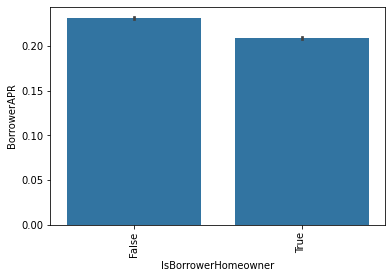

In [49]:
sb.barplot(data=loans2,x='IsBorrowerHomeowner', y = 'BorrowerAPR', color = base_color);
plt.xticks(rotation=90);

##### The people who don't own a home have higher APR (Anual Percentage Rate) for their loans

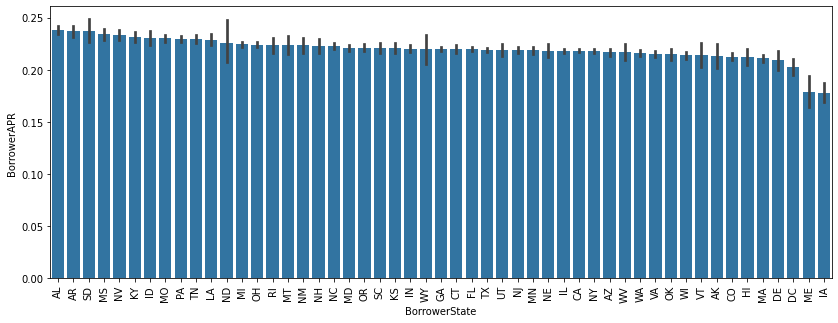

In [47]:
order_by_APR = pd.DataFrame(loans2.groupby(['BorrowerState']).mean()['BorrowerAPR']).sort_values(by=['BorrowerAPR'], ascending=False).index
plt.figure(figsize = [14,5])
sb.barplot(data=loans2,x='BorrowerState', y = 'BorrowerAPR', color = base_color, order = order_by_APR);
plt.xticks(rotation=90);

##### ME and IA states have a low ARP (Anual Percentage Rate)